 # Earthquakers in Indonesia
_Gempa di Indonesia_

## Anggota Kelompok

1. I Putu Natha Kusuma (235150201111023)
2. Qori Imaduddin (235150200111023)
3. Yoga Raditya Nala (235150201111020)

## Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nathakusuma/stp-data-gempa/main/katalog_gempa.csv")
df

tgl            ot   lat     lon  depth  mag  \
0      2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1      2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2      2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3      2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4      2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   
...           ...           ...   ...     ...    ...  ...   
92882  2023/01/26  02:25:09.288  3.24  127.18     10  4.0   
92883  2023/01/26  02:15:03.893  2.70  127.10     10  3.9   
92884  2023/01/26  01:57:08.885 -7.83  121.07     10  3.8   
92885  2023/01/26  01:46:21.009  3.00  127.16     10  4.1   
92886  2023/01/26  00:00:35.181 -8.87  118.95     10  2.4   

                           remark  strike1  dip1  rake1  strike2  dip2  rake2  
0        Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                       Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2                Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3               Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                       Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
...                           ...      ...   ...    ...      ...   ...    ...  
92882  Talaud Islands - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
92883        Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92884                  Flores Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92885        Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92886  Sumbawa Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  

[92887 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


## Tentang Dataset

Dataset ini berasal dari BMKG yang berisi tentang kejadian gempa dari 1 November 2008 hingga 26 Januari 2023 yang memiliki **92887 record data**.

Variabel yang ada di dataset ini:
- `tgl` (object): tanggal kejadian
- `ot` (object): timestamp kejadian
- `lat` (float64): garis lintang episentrum kejadian (derajat), berkisar antara 6N sampai 11S
- `lon` (float64): garis bujur episentrum peristiwa (derajat), berkisar antara 142E sampai 94E
- `depth` (int64): kedalaman kejadian (km)
- `mag` (float64): magnitudo kejadian, berkisar dari 1 hingga 9.5
- `remark` (object): Flinn-Engdahl regions dari kejadian

Kadang, mekanisme focal dari kejadian diukur. Dalam kasus tersebut, nilai dari `dip1`, `strike1`, `rake1`, `dip2`, `strike2`, dan `rake2` tidak kosong.

## Data Preparation

### Perbaiki format tanggal dan waktu

In [ ]:
df['datetime'] = pd.to_datetime(df['tgl'] + ' ' + df['ot'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['hour'] = df['datetime'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tgl       92887 non-null  object        
 1   ot        92887 non-null  object        
 2   lat       92887 non-null  float64       
 3   lon       92887 non-null  float64       
 4   depth     92887 non-null  int64         
 5   mag       92887 non-null  float64       
 6   remark    92887 non-null  object        
 7   strike1   2735 non-null   float64       
 8   dip1      2735 non-null   float64       
 9   rake1     2735 non-null   float64       
 10  strike2   2735 non-null   float64       
 11  dip2      2735 non-null   float64       
 12  rake2     2735 non-null   float64       
 13  datetime  92887 non-null  datetime64[ns]
 14  year      92887 non-null  int64         
 15  month     92887 non-null  object        
 16  hour      92887 non-null  int64         
dtypes: datetime6

### Ganti urutan kolom pada dataframe

In [ ]:
new_cols = ['remark', 'mag', 'depth', 'datetime', 'lat', 'lon', 'year', 'month', 'hour']
df = df[new_cols]
df = df.reindex(columns = new_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   remark    92887 non-null  object        
 1   mag       92887 non-null  float64       
 2   depth     92887 non-null  int64         
 3   datetime  92887 non-null  datetime64[ns]
 4   lat       92887 non-null  float64       
 5   lon       92887 non-null  float64       
 6   year      92887 non-null  int64         
 7   month     92887 non-null  object        
 8   hour      92887 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 6.4+ MB


### Rename kolom

In [ ]:
df.rename(columns = {'remark': 'location', 'mag': 'magnitude', 'depth': 'depth_km',
                     'lat': 'latitude', 'lon': 'longitude'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   92887 non-null  object        
 1   magnitude  92887 non-null  float64       
 2   depth_km   92887 non-null  int64         
 3   datetime   92887 non-null  datetime64[ns]
 4   latitude   92887 non-null  float64       
 5   longitude  92887 non-null  float64       
 6   year       92887 non-null  int64         
 7   month      92887 non-null  object        
 8   hour       92887 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 6.4+ MB


### Cek data duplikat

In [ ]:
df.duplicated().sum()

2735

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90152 entries, 0 to 92886
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   location   90152 non-null  object        
 1   magnitude  90152 non-null  float64       
 2   depth_km   90152 non-null  int64         
 3   datetime   90152 non-null  datetime64[ns]
 4   latitude   90152 non-null  float64       
 5   longitude  90152 non-null  float64       
 6   year       90152 non-null  int64         
 7   month      90152 non-null  object        
 8   hour       90152 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 6.9+ MB


### Cek data null

In [ ]:
df.isna().sum()

location     0
magnitude    0
depth_km     0
datetime     0
latitude     0
longitude    0
year         0
month        0
hour         0
dtype: int64

### Cek data outlier

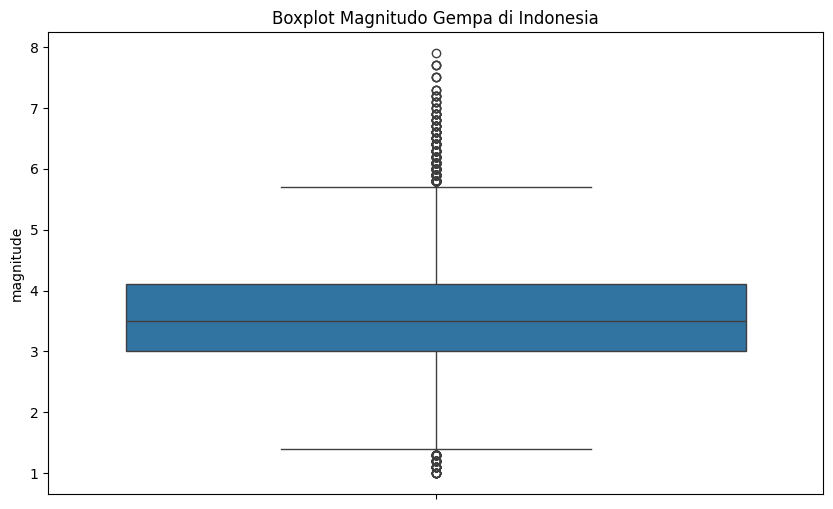

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['magnitude'])
plt.title('Boxplot Magnitudo Gempa di Indonesia')
plt.show()

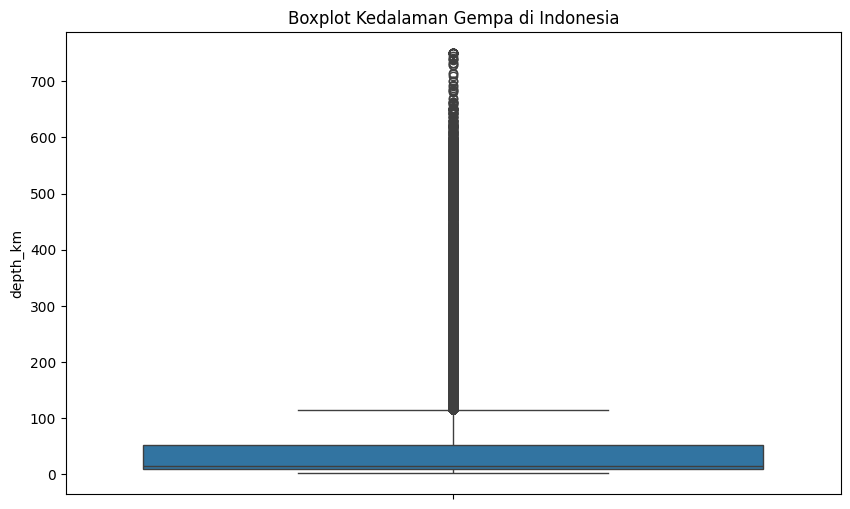

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['depth_km'])
plt.title('Boxplot Kedalaman Gempa di Indonesia')
plt.show()

## Exploratory Data Analysis

In [ ]:
df['location'].value_counts()

Minahassa Peninsula - Sulawesi        9294
Sulawesi - Indonesia                  7762
Sumbawa Region - Indonesia            7202
Java - Indonesia                      6591
Northern Sumatra - Indonesia          5763
Southern Sumatra - Indonesia          5084
Northern Molucca Sea                  4828
Banda Sea                             4723
Seram - Indonesia                     4264
Halmahera - Indonesia                 3507
Irian Jaya Region - Indonesia         3043
South of Java - Indonesia             2414
Talaud Islands - Indonesia            2319
Flores Region - Indonesia             2298
Timor Region                          1911
Flores Sea                            1844
Near North Coast of Irian Jaya        1812
Sumba Region - Indonesia              1806
Irian Jaya - Indonesia                1588
Ceram Sea                             1514
Bali Region - Indonesia               1354
Southern Molucca Sea                  1224
Off West Coast of Northern Sumatra    1002
Sunda Strai

In [ ]:
fig1 = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="location", hover_data=["magnitude", "depth_km"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig1.update_layout(
    mapbox_style = "white-bg",
    mapbox_layers = [
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
    ])
fig1.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig1.show()

### Analisis berdasarkan magnitudo

In [ ]:
df.sort_values(by='magnitude', ascending=False)

location  magnitude  depth_km  \
345       Irian Jaya Region - Indonesia        7.9        17   
2472       Southern Sumatra - Indonesia        7.7        81   
5480       Northern Sumatra - Indonesia        7.7        29   
25283  Southwest of Sumatra - Indonesia        7.7        19   
331       Irian Jaya Region - Indonesia        7.5        51   
...                                 ...        ...       ...   
77447              Sulawesi - Indonesia        1.0        10   
73426         Flores Region - Indonesia        1.0        14   
75131      Southern Sumatra - Indonesia        1.0        21   
75400         Flores Region - Indonesia        1.0        10   
75125      Southern Sumatra - Indonesia        1.0        10   

                     datetime  latitude  longitude  year      month  hour  
345   2009-01-03 19:43:54.962     -0.54     132.89  2009    January    19  
2472  2009-09-30 10:16:10.432     -0.80      99.88  2009  September    10  
5480  2010-04-06 22:15:03.209      2.24      97.11  2010      April    22  
25283 2016-03-02 12:49:47.458     -4.92      94.31  2016      March    12  
331   2009-01-03 22:33:45.363     -0.82     133.41  2009    January    22  
...                       ...       ...        ...   ...        ...   ...  
77447 2021-09-24 14:43:13.253     -2.42     121.13  2021  September    14  
73426 2021-05-07 18:26:56.891     -8.64     121.78  2021        May    18  
75131 2021-07-01 15:53:05.379     -5.59     104.59  2021       July    15  
75400 2021-07-04 03:26:41.348     -8.60     121.48  2021       July     3  
75125 2021-07-01 16:25:09.402     -5.59     104.57  2021       July    16  

[90152 rows x 9 columns]

Modus

In [ ]:
modus_Mag = df['magnitude'].mode()

print("Modus :", modus_Mag[0])

Modus : 3.3


Range

In [ ]:
jangkauan = df['magnitude'].max() - df['magnitude'].min()

print("Nilai Range :", jangkauan)

Nilai Range : 6.9


Rata-rata, standar deviasi, kuartil, median

In [ ]:
df['magnitude'].describe()

count    90152.000000
mean         3.550424
std          0.803019
min          1.000000
25%          3.000000
50%          3.500000
75%          4.100000
max          7.900000
Name: magnitude, dtype: float64

Desil

In [ ]:
np.percentile(df['magnitude'], np.arange(0, 100, 10))

array([1. , 2.5, 2.9, 3.1, 3.3, 3.5, 3.7, 4. , 4.3, 4.6])

Simpangan rata-rata

In [ ]:
mean_value = df['magnitude'].mean()

absolute_difference = abs(df['magnitude'] - mean_value)

mean_absolute_deviation = absolute_difference.mean()

mean_absolute_deviation

0.6529195419111377

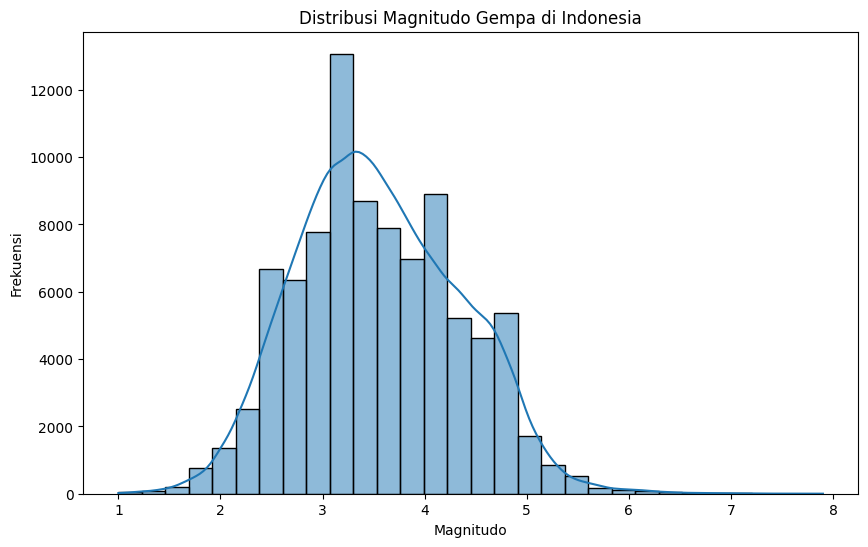

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], kde=True, bins=30)
plt.title('Distribusi Magnitudo Gempa di Indonesia')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.show()

#### Pengelompokan Magnitudo

![Infografis](https://indonesiabaik.id/public/uploads/post/6368/6368-1669356961-221124_IEI_Magnitudo,%20%20Ukuran%20Kekuatan%20Gempa%20yang%20Dipakai%20Indonesia_NH.jpeg)

In [ ]:
list_mag = []
for i in df['magnitude'].tolist():
    t_mag = ''
    if i < 2.5:
        t_mag = 'Level 1 (< 2,5 M)'
    elif i < 5.5:
        t_mag = 'Level 2 (2,5 - 5,4 M)'
    elif i < 6.1:
        t_mag = 'Level 3 (5,5 - 6,0 M)'
    elif i < 7.0:
        t_mag = 'Level 4 (6,1 - 6,9 M)'
    elif i < 8.0:
        t_mag = 'Level 5 (7,0 - 7,9 M)'
    else:
        t_mag = 'Level 6 (>= 8,0 M)'
    list_mag.append(t_mag)
df['magnitude_level'] = list_mag

new_cols = ['location', 'magnitude', 'depth_km', 'datetime', 'latitude', 'longitude', 'magnitude_level', 'year', 'month', 'hour']
df = df[new_cols]
df = df.reindex(columns = new_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90152 entries, 0 to 92886
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   location         90152 non-null  object        
 1   magnitude        90152 non-null  float64       
 2   depth_km         90152 non-null  int64         
 3   datetime         90152 non-null  datetime64[ns]
 4   latitude         90152 non-null  float64       
 5   longitude        90152 non-null  float64       
 6   magnitude_level  90152 non-null  object        
 7   year             90152 non-null  int64         
 8   month            90152 non-null  object        
 9   hour             90152 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 7.6+ MB


In [ ]:
lvl_mag = df.groupby(['magnitude_level'], as_index = False, sort = True).count()

fig2 = px.pie(lvl_mag, values = 'location', names = 'magnitude_level', color = 'magnitude_level',
             title = 'Distribusi Level Magnitudo Gempa di Indonesia')
fig2.show()

In [ ]:
fig3 = px.bar(lvl_mag, x = 'magnitude_level', y = 'location', color = 'magnitude_level',
              text_auto = True, title = 'Frekuensi Gempa berdasarkan Level Magnitudo di Indonesia')
fig3.show()

In [ ]:
df['magnitude_level'].value_counts().sort_index()

Level 1 (< 2,5 M)         6835
Level 2 (2,5 - 5,4 M)    82511
Level 3 (5,5 - 6,0 M)      604
Level 4 (6,1 - 6,9 M)      179
Level 5 (7,0 - 7,9 M)       23
Name: magnitude_level, dtype: int64

#### Analisis gempa dengan dampak sedang hingga serius (magnitudo level 3 ke atas)

In [ ]:
df_upmag = df[df['magnitude'] >= 5.5]
fig4 = px.scatter_mapbox(df_upmag, lat="latitude", lon="longitude", hover_name="location",
                         hover_data=["magnitude", "depth_km"], color="magnitude_level",
                         zoom=3, height=300)
fig4.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
    ])
fig4.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig4.show()

In [ ]:
df_upmag['location'].value_counts()

Banda Sea                             98
Southern Sumatra - Indonesia          63
Northern Molucca Sea                  52
Irian Jaya Region - Indonesia         50
Talaud Islands - Indonesia            45
Minahassa Peninsula - Sulawesi        41
Northern Sumatra - Indonesia          38
Mindanao - Philippines                31
Irian Jaya - Indonesia                27
Southwest of Sumatra - Indonesia      26
Java - Indonesia                      26
Halmahera - Indonesia                 24
Borneo                                23
Sulawesi - Indonesia                  23
Seram - Indonesia                     19
Sumbawa Region - Indonesia            18
Near North Coast of Irian Jaya        16
South of Java - Indonesia             15
Celebes Sea                           15
Tanimbar Islands Reg. - Indonesia     14
Timor Region                          13
Off West Coast of Northern Sumatra    13
Flores Sea                            12
Southern Molucca Sea                  12
Java Sea        

### Analisis berdasarkan waktu

#### Frekuensi gempa berdasarkan tahun

In [ ]:
df = df.sort_values(by='datetime', ascending=True)
freq_year = df.groupby(['year'], as_index = False, sort = False).count()

fig5 = px.line(freq_year, x = 'year', y = 'location', markers = True,
               labels = {'location': 'frekuensi'}, title = 'Frekuensi Gempa di Indonesia Berdasarkan Tahun')
fig5.show()

In [ ]:
df['year'].value_counts().sort_index()

2008      316
2009     3534
2010     3437
2011     3940
2012     2422
2013     2719
2014     2410
2015     5314
2016     4970
2017     7145
2018    11941
2019    11715
2020     8403
2021    10356
2022    10402
2023     1128
Name: year, dtype: int64

#### Frekuensi gempa berdasarkan bulan

In [ ]:
freq_month = df.groupby(['month'], as_index = False, sort = False).count()

month_ord = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']

freq_month.month = pd.Categorical(freq_month.month, categories = month_ord, ordered = True)
freq_month = freq_month.sort_values('month')

fig6 = px.line(freq_month, x = 'month', y = 'location', markers = True,
               labels = {'location': 'frequency'}, title = 'Frekuensi Gempa di Indonesia Berdasarkan Bulan')
fig6.show()

In [ ]:
df['month'].value_counts()

December     8752
August       8459
January      8444
November     8405
April        7989
March        7583
February     7368
October      6975
July         6895
September    6698
May          6326
June         6258
Name: month, dtype: int64

#### Frekuensi gempa berdasarkan jam

In [ ]:
freq_hour = df.groupby(['hour'], as_index = False).count()

fig7 = px.line(freq_hour, x = 'hour', y = 'location', markers = True,
              labels = {'location': 'frequency'}, title = 'Frequency of Earthquakes in Indonesia by Hour')

fig7.update_layout(
    xaxis = dict(
        dtick = 1
    )
)

fig7.show()

In [ ]:
df['hour'].value_counts()

16    4751
17    4659
18    4605
15    4506
19    4493
14    4254
20    4100
13    3963
21    3740
12    3697
11    3681
4     3649
3     3570
5     3563
10    3545
22    3510
7     3378
9     3372
6     3286
2     3281
8     3217
23    3209
1     3064
0     3059
Name: hour, dtype: int64

### Analisis berdasarkan kedalaman

In [ ]:
df = df.sort_values(by='depth_km', ascending=False)
df

location  magnitude  depth_km  \
71067    Northern Sumatra - Indonesia        3.2       750   
73843            Sulawesi - Indonesia        3.2       750   
73814            Sulawesi - Indonesia        4.1       750   
968    Minahassa Peninsula - Sulawesi        4.1       750   
33263                       Banda Sea        4.0       750   
...                               ...        ...       ...   
20140            Sulawesi - Indonesia        3.0         2   
760          Sunda Strait - Indonesia        4.3         2   
3161    Irian Jaya Region - Indonesia        5.2         2   
84860    Southern Sumatra - Indonesia        3.0         2   
2249     Southern Sumatra - Indonesia        3.3         2   

                     datetime  latitude  longitude        magnitude_level  \
71067 2021-02-10 08:40:50.382      0.09      97.30  Level 2 (2,5 - 5,4 M)   
73843 2021-05-21 12:19:41.877     -1.77     120.90  Level 2 (2,5 - 5,4 M)   
73814 2021-05-21 22:37:59.461     -1.03     123.98  Level 2 (2,5 - 5,4 M)   
968   2009-03-07 18:44:57.356     -0.06     123.99  Level 2 (2,5 - 5,4 M)   
33263 2017-07-13 15:44:18.269     -5.38     124.53  Level 2 (2,5 - 5,4 M)   
...                       ...       ...        ...                    ...   
20140 2015-03-31 04:20:19.224     -3.09     119.52  Level 2 (2,5 - 5,4 M)   
760   2009-02-17 18:32:31.434     -6.29     104.96  Level 2 (2,5 - 5,4 M)   
3161  2009-11-19 23:07:33.160     -0.99     134.62  Level 2 (2,5 - 5,4 M)   
84860 2022-05-07 13:33:37.542     -0.19     100.35  Level 2 (2,5 - 5,4 M)   
2249  2009-08-19 09:38:56.797     -0.48     100.33  Level 2 (2,5 - 5,4 M)   

       year     month  hour  
71067  2021  February     8  
73843  2021       May    12  
73814  2021       May    22  
968    2009     March    18  
33263  2017      July    15  
...     ...       ...   ...  
20140  2015     March     4  
760    2009  February    18  
3161   2009  November    23  
84860  2022       May    13  
2249   2009    August     9  

[90152 rows x 10 columns]

Buat depth_km menjadi data berkelompok

In [ ]:
J = df['depth_km'].max() - df['depth_km'].min()
J

748

In [ ]:
n = df.shape[0]
n

90152

In [ ]:
k = np.ceil(1 + 3.3 * np.log10(n))
k

18.0

In [ ]:
panjang_kelas = np.ceil(J / k)
panjang_kelas

42.0

In [ ]:
bins = np.arange(df['depth_km'].min(), df['depth_km'].max() + panjang_kelas, panjang_kelas)
bins

array([  2.,  44.,  86., 128., 170., 212., 254., 296., 338., 380., 422.,
       464., 506., 548., 590., 632., 674., 716., 758.])

In [ ]:
df['depth_class'] = pd.cut(df['depth_km'], bins, include_lowest = True, right = False)
df

location  magnitude  depth_km  \
71067    Northern Sumatra - Indonesia        3.2       750   
73843            Sulawesi - Indonesia        3.2       750   
73814            Sulawesi - Indonesia        4.1       750   
968    Minahassa Peninsula - Sulawesi        4.1       750   
33263                       Banda Sea        4.0       750   
...                               ...        ...       ...   
20140            Sulawesi - Indonesia        3.0         2   
760          Sunda Strait - Indonesia        4.3         2   
3161    Irian Jaya Region - Indonesia        5.2         2   
84860    Southern Sumatra - Indonesia        3.0         2   
2249     Southern Sumatra - Indonesia        3.3         2   

                     datetime  latitude  longitude        magnitude_level  \
71067 2021-02-10 08:40:50.382      0.09      97.30  Level 2 (2,5 - 5,4 M)   
73843 2021-05-21 12:19:41.877     -1.77     120.90  Level 2 (2,5 - 5,4 M)   
73814 2021-05-21 22:37:59.461     -1.03     123.98  Level 2 (2,5 - 5,4 M)   
968   2009-03-07 18:44:57.356     -0.06     123.99  Level 2 (2,5 - 5,4 M)   
33263 2017-07-13 15:44:18.269     -5.38     124.53  Level 2 (2,5 - 5,4 M)   
...                       ...       ...        ...                    ...   
20140 2015-03-31 04:20:19.224     -3.09     119.52  Level 2 (2,5 - 5,4 M)   
760   2009-02-17 18:32:31.434     -6.29     104.96  Level 2 (2,5 - 5,4 M)   
3161  2009-11-19 23:07:33.160     -0.99     134.62  Level 2 (2,5 - 5,4 M)   
84860 2022-05-07 13:33:37.542     -0.19     100.35  Level 2 (2,5 - 5,4 M)   
2249  2009-08-19 09:38:56.797     -0.48     100.33  Level 2 (2,5 - 5,4 M)   

       year     month  hour     depth_class  
71067  2021  February     8  [716.0, 758.0)  
73843  2021       May    12  [716.0, 758.0)  
73814  2021       May    22  [716.0, 758.0)  
968    2009     March    18  [716.0, 758.0)  
33263  2017      July    15  [716.0, 758.0)  
...     ...       ...   ...             ...  
20140  2015     March     4     [2.0, 44.0)  
760    2009  February    18     [2.0, 44.0)  
3161   2009  November    23     [2.0, 44.0)  
84860  2022       May    13     [2.0, 44.0)  
2249   2009    August     9     [2.0, 44.0)  

[90152 rows x 11 columns]

In [ ]:
df['depth_class'].value_counts().sort_index()

[2.0, 44.0)       65328
[44.0, 86.0)       8996
[86.0, 128.0)      5904
[128.0, 170.0)     4505
[170.0, 212.0)     2390
[212.0, 254.0)      922
[254.0, 296.0)      562
[296.0, 338.0)      286
[338.0, 380.0)      206
[380.0, 422.0)      206
[422.0, 464.0)      149
[464.0, 506.0)      132
[506.0, 548.0)      241
[548.0, 590.0)      173
[590.0, 632.0)       78
[632.0, 674.0)       33
[674.0, 716.0)       12
[716.0, 758.0)       29
Name: depth_class, dtype: int64

Rumus mean data berkelompok:

$$\bar{x} = \frac{\sum X_i f_i}{n}$$

Keterangan: \\
$\bar{x}$ = rata-rata data \\
$X_i$ = nilai tengah kelas ke-i \\
$f_i$ = frekuensi kelas ke-i \\
$n$ = banyak data


In [ ]:
total = 0
nilai_tengah = np.array([23, 42, 107, 149, 191, 233, 275, 317, 359, 401, 443, 485, 527, 569, 611, 653, 659, 737])
frekuensi = np.array([65328, 8996, 5904, 4505, 2390, 922, 562, 286, 206, 206, 149, 132, 241, 173, 78, 33, 12, 29])
total_frekuensi = np.sum(frekuensi)

for i in range(18):
  total += (nilai_tengah[i] * frekuensi[i])

Mean = total/total_frekuensi
Mean

52.249489750643356

Rumus modus data berkelompok:

$$Mo = L + i \times \left( \frac{b_1}{b_1+b_2} \right)$$

Keterangan: \\
$L$ = tepi bawah kelas modus \\
$i$ = panjang kelas \\
$b_1$ = selisih frekuensi modus dengan frekuensi kelas sebelumnya \\
$b_2$ = selisih frekuensi modus dengan frekuensi kelas setelahnya

In [ ]:
Mo = 1.5 + (65328/(65328+56332)) * panjang_kelas
Mo

24.05281933256617

Rumus median data berkelompok:

$$Me = L + \left( \frac{\frac{n}{2} - F}{f} \right) \times i$$

Keterangan: \\
$L$ = tepi bawah kelas median \\
$n$ = jumlah data \\
$F$ = frekuensi kumulatif sebelum kelas median \\
$f$ = frekuensi kelas median \\
$i$ = panjang kelas

In [ ]:
df['depth_class'].sort_index()[k/2]

Interval(2.0, 44.0, closed='left')

In [ ]:
Median = 1.5 + ((45076 - 0)/65328) * panjang_kelas
Median

30.47979426891991

Rumus Kuartil data berkelompok:

$$Q_i = L + \left( \frac{\frac{i \times n}{4} - f_k}{f_Q} \right) \times i$$

Keterangan: \\
$L$ = tepi bawah kelas kuartil \\
$Q_i$	: kuartil ke-i \\
$f_k$	: frekuensi kumulatif sebelum kelas kuartil \\
$f_Q$	: frekuensi kelas kuartil \\
$p$	: panjang kelas \\
$n$	: banyak data

In [ ]:
tepi_bawah_kuartil = [1.5, 1.5, 43.5]
kuartil_ke = [22538, 45076, 67614]
f_k = [0, 0, 65328]
f_q = [65328, 65328, 8996]

for i in range(3):
  total = tepi_bawah_kuartil[i] + ((kuartil_ke[i] - f_k[i])/f_q[i]) * panjang_kelas
  print(f"Kuartil ke-{i + 1} :", total)

Kuartil ke-1 : 15.989897134459955
Kuartil ke-2 : 30.47979426891991
Kuartil ke-3 : 54.17274344152957


Rumus Desil data berkelompok:

$$D_i = L + \left( \frac{\frac{i \times n}{10} - f_k}{f_D} \right) \times i$$

Keterangan: \\
$L$ = tepi bawah kelas kuartil \\
$D_i$	: desil ke-i \\
$f_k$	: frekuensi kumulatif sebelum kelas desil \\
$f_D$	: frekuensi kelas desil \\
$p$	: panjang kelas \\
$n$	: banyak data

In [ ]:
tepi_bawah_desil = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 43.5, 127.5]
desil_ke = [9015.2, 18030.4, 27045.6, 36060.8, 45076, 54091.2, 63106.4, 72121.6, 81136.8]
f_k = [0, 0, 0, 0, 0, 0, 0, 65328, 80228]
f_q = [65328, 65328, 65328, 65328, 65328, 65328, 65328, 8996, 4505]

for i in range(9):
  total = tepi_bawah_desil[i] + ((desil_ke[i] - f_k[i])/f_q[i]) * panjang_kelas
  print(f"Desil ke-{i + 1} :", total)

Desil ke-1 : 7.295958853783983
Desil ke-2 : 13.091917707567966
Desil ke-3 : 18.887876561351945
Desil ke-4 : 24.68383541513593
Desil ke-5 : 30.47979426891991
Desil ke-6 : 36.27575312270389
Desil ke-7 : 42.071711976487876
Desil ke-8 : 75.21756336149403
Desil ke-9 : 135.97271920088792


Range

$$Tepi\ Atas\ dari\ Kelas\ Terbesar\ -\ Tepi\ Atas\ dari\ Kelas\ Terkecil$$

$$Atau$$

$$Tepi\ Bawah\ dari\ Kelas\ Terbesar\ -\ Tepi\ Bawah\ dari\ Kelas\ Terkecil$$

In [ ]:
715.5 - 1.5

714.0

Rumus Rata-Rata Deviasi data berkelompok:

$$SR = \frac{\sum f_i \left| x_i - \bar{x} \right|}{\sum f_i}$$

Keterangan: \\
$SR$ = simpangan rata-rata \\
$f_i$	: frekuensi kelas ke-i \\
$x_i$	: nilai tengah kelas ke-i \\
$\bar{x}$	: rata-rata data \\
$\sum f_i $	: total frekuensi data

In [ ]:
total = 0
xi_xbar = []

for i in range(18):
  xi_xbar.append(abs(nilai_tengah[i] - Mean))
  total += (frekuensi[i] * xi_xbar[i])

SR = total / total_frekuensi
SR

44.43639799953006

Rumus Deviasi Standard data berkelompok:

$$STD = \sqrt\frac{\sum f_i (x_i - \bar{x})^2}{\sum f_i}$$

Keterangan: \\
$STD$ = deviasi standard \\
$f_i$	: frekuensi kelas ke-i \\
$x_i$	: nilai tengah kelas ke-i \\
$\bar{x}$	: rata-rata data \\
$\sum f_i $	: total frekuensi data

In [ ]:
total = 0

for i in range(18):
  total += frekuensi[i] * np.square(xi_xbar[i])

STD = np.sqrt(total/total_frekuensi)
STD

73.53364841759247

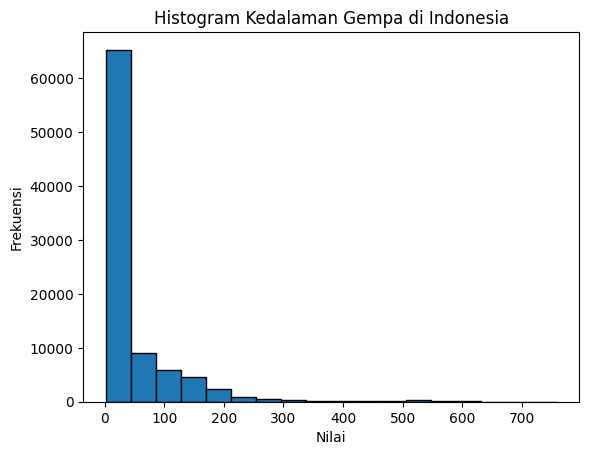

In [ ]:
plt.hist(df['depth_km'], bins=bins, edgecolor='black')

plt.title('Histogram Kedalaman Gempa di Indonesia')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

plt.show()

### Analisis magnitudo gempa terhadap kedalaman

In [ ]:
fig10 = px.scatter(df, x = 'depth_km', y = 'magnitude',
                  labels = {'depth_km': 'Kedalaman (km)', 'magnitude': 'Magnitudo'},
                  title = 'Hubungan Magnitudo Gempa dengan Kedalaman di Indonesia')
fig10.show()